## Ceneo Analyzer

## loading libraries

In [23]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Listing codes for all products for which opinions have been extracted

In [20]:
if os.path.exists("opinions"):
    print(*[filename.split(".")[0] for filename in os.listdir("opinions")], sep="\n")
    

136115744


## specifying opinions about which product are to be analyzed

In [13]:
product_id = input("Please provide Ceneo.pl product code: ")

## Importing opinions from JSON file to pandas.DataFrame object 

In [14]:
opinions = pd.read_json (f'opinions/{product_id}.json')
MAX_SCORE =  5
opinions.score = opinions.score.apply(lambda s: round(s*MAX_SCORE))

## Basic statistics

In [15]:
MAX_SCORE =  5
opinions_count = opinions.index.size
pros_count = opinions.pros.apply(lambda p:None if not p else p).count()
cons_count = opinions.cons.apply(lambda c:None if not c else c).count()
average_score = opinions.score.mean()

## Basic charts 

### Score histogram

[Text(0, 0, '3'),
 Text(0, 0, ''),
 Text(0, 0, '2'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '1'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '4')]

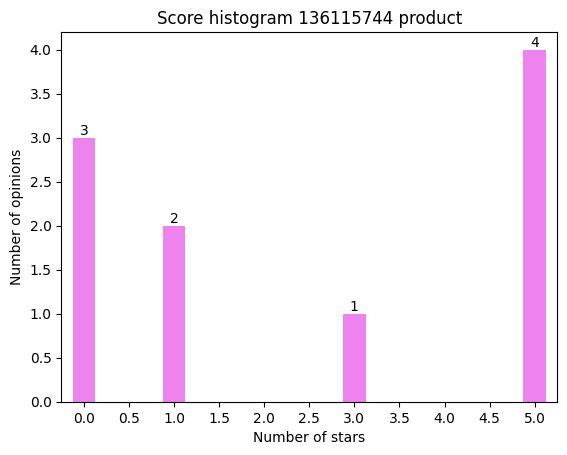

In [56]:
score_distribution =opinions.score.value_counts().reindex(np.arange(0,5.5,0.5), fill_value = 0)
fig, ax=plt.subplots()
score_distribution.plot.bar(color = "violet")
plt.xlabel("Number of stars")
plt.ylabel("Number of opinions")
plt.xticks(rotation = 0)
plt.title(f"Score histogram {product_id} product")
ax.bar_label(ax.containers[0], label_type='edge', fmt = lambda l:int(l) if l else "")

### Recommendations shares

Text(0.5, 1.0, 'Recommendation shares 136115744 product')

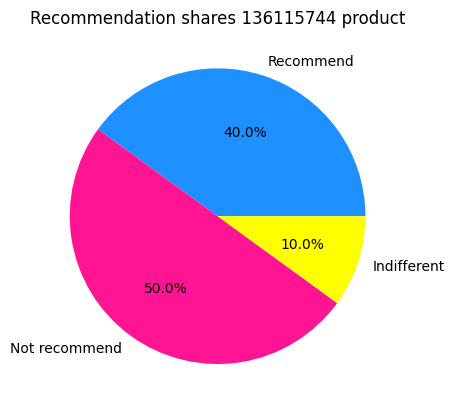

In [55]:
recommendation_distribution = opinions.recommendation.value_counts(dropna=False).reindex([True, False, np.nan], fill_value = 0)
recommendation_distribution.plot.pie(
    labels =["Recommend", "Not recommend", "Indifferent"],
    label = "",
    colors = ["dodgerblue", "deeppink", "yellow"],
    autopct = lambda l: "{:1.1f}%".format(l) if l else ""
)
plt.title(f"Recommendation shares {product_id} product")


In [17]:
average_score

2.5

In [30]:
opinions.pros

0                                                 None
1                 {'pl': ['tanio'], 'en': ['cheaply']}
2    {'pl': ['łatwa aktywacja', 'tanio'], 'en': ['e...
3    {'pl': ['chyba oryginalnie', 'najnowsze', 'tan...
4                                                 None
5                                                 None
6                                                 None
7    {'pl': ['najnowsze', 'tanio'], 'en': ['latest'...
8                                                 None
9                                                 None
Name: pros, dtype: object

In [31]:
opinions

,opinion_id,author,recommendation,score,content,pros,cons,helpful,unhelpful,publish_date,purchase_date
0,16962353,l...i,1.0,5,"{'pl': 'Wszystko ok, miałem problem z instalac...",None,None,3,8,2023-01-02 10:41:52,2022-12-28 10:17:31
1,18371950,a...t,1.0,5,"{'pl': 'dobry program :)', 'en': 'good program...","{'pl': ['tanio'], 'en': ['cheaply']}",None,0,0,2024-02-06 11:56:36,2024-01-23 12:16:42
2,18447761,x...3,1.0,5,"{'pl': 'Otrzymałem klucz Office, który w zasad...","{'pl': ['łatwa aktywacja', 'tanio'], 'en': ['e...","{'pl': ['aktywacja tel trudna'], 'en': ['phone...",0,0,2024-02-29 08:31:01,2024-02-28 22:11:24
3,17273995,k...9,NaN,3,{'pl': 'Jakby tanio ale pobiera sie stacje dys...,"{'pl': ['chyba oryginalnie', 'najnowsze', 'tan...","{'pl': ['aktywacja tel trudna', 'pobierasz lin...",4,1,2023-03-15 22:06:33,2023-03-06 21:32:12
4,16796369,k...5,1.0,5,{'pl': 'Wszystko przebiegło doskonale i bez za...,None,None,4,10,2022-11-26 08:31:00,2022-10-05 13:33:06
5,17954672,z...1,0.0,0,{'pl': 'Problem z aktywacją telefoniczną (wedl...,None,None,5,0,2023-09-30 08:18:22,2023-09-15 22:27:56
6,17977033,d...1,0.0,1,"{'pl': 'Kod nie dziala', 'en': 'The code doesn...",None,None,5,0,2023-10-06 20:55:42,2023-09-02 21:05:16
7,18348720,m...a,0.0,0,"{'pl': 'klucz nieważny', 'en': 'key invalid'}","{'pl': ['najnowsze', 'tanio'], 'en': ['latest'...",None,0,1,2024-01-30 08:07:26,2024-01-02 14:55:30
8,17539333,a...3,0.0,1,{'pl': 'Unikać tych *****. Zmarnowane pieniądz...,None,"{'pl': ['chyba oryginalnie', 'najnowsze', 'tan...",10,1,2023-05-23 21:36:38,2023-05-09 19:09:40
9,18142069,doink,0.0,0,{'pl': 'No niestety słabo to wygląda. Kupiłem ...,None,None,4,0,2023-11-27 12:09:06,2023-10-29 20:28:47
